In [25]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

def generate_data(seq_length=50, num_samples=1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x) + 0.1 * np.random.normal(0, 1, num_samples)
    sequences, targets = [], []
    for i in range(len(y) - seq_length):
        sequences.append(y[i:i + seq_length])
        targets.append(y[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 50
X, y = generate_data(seq_length)

X_tensor = torch.FloatTensor(X).unsqueeze(-1)
y_tensor = torch.FloatTensor(y)

train_size = int(0.8 * len(X_tensor))
train_dataset = TensorDataset(X_tensor[:train_size], y_tensor[:train_size])
test_dataset = TensorDataset(X_tensor[train_size:], y_tensor[train_size:])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [2]:
import torch.nn as nn
import torch.optim as optim

class RNNPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, output_size=1):
        super(RNNPredictor, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, h_n = self.rnn(x)
        out = self.fc(h_n[-1])
        return out

RNNmodel = RNNPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(RNNmodel.parameters(), lr=0.01)

num_epochs = 50
for epoch in range(num_epochs):
    RNNmodel.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = RNNmodel(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')


Epoch [1/50], Loss: 0.0658
Epoch [2/50], Loss: 0.0205
Epoch [3/50], Loss: 0.0191
Epoch [4/50], Loss: 0.0184
Epoch [5/50], Loss: 0.0165
Epoch [6/50], Loss: 0.0146
Epoch [7/50], Loss: 0.0157
Epoch [8/50], Loss: 0.0164
Epoch [9/50], Loss: 0.0156
Epoch [10/50], Loss: 0.0171
Epoch [11/50], Loss: 0.0154
Epoch [12/50], Loss: 0.0164
Epoch [13/50], Loss: 0.0157
Epoch [14/50], Loss: 0.0164
Epoch [15/50], Loss: 0.0148
Epoch [16/50], Loss: 0.0153
Epoch [17/50], Loss: 0.0202
Epoch [18/50], Loss: 0.0173
Epoch [19/50], Loss: 0.0150
Epoch [20/50], Loss: 0.0150
Epoch [21/50], Loss: 0.0162
Epoch [22/50], Loss: 0.0170
Epoch [23/50], Loss: 0.0137
Epoch [24/50], Loss: 0.0159
Epoch [25/50], Loss: 0.0166
Epoch [26/50], Loss: 0.0134
Epoch [27/50], Loss: 0.0144
Epoch [28/50], Loss: 0.0150
Epoch [29/50], Loss: 0.0136
Epoch [30/50], Loss: 0.0138
Epoch [31/50], Loss: 0.0157
Epoch [32/50], Loss: 0.0150
Epoch [33/50], Loss: 0.0138
Epoch [34/50], Loss: 0.0135
Epoch [35/50], Loss: 0.0145
Epoch [36/50], Loss: 0.0161
E

In [3]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, output_size=1):
        super(LSTMPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

LSTMmodel = LSTMPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(LSTMmodel.parameters(), lr=0.01)

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    LSTMmodel.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = LSTMmodel(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')


Epoch [1/50], Loss: 0.2053
Epoch [2/50], Loss: 0.0194
Epoch [3/50], Loss: 0.0172
Epoch [4/50], Loss: 0.0168
Epoch [5/50], Loss: 0.0161
Epoch [6/50], Loss: 0.0147
Epoch [7/50], Loss: 0.0142
Epoch [8/50], Loss: 0.0139
Epoch [9/50], Loss: 0.0144
Epoch [10/50], Loss: 0.0137
Epoch [11/50], Loss: 0.0133
Epoch [12/50], Loss: 0.0132
Epoch [13/50], Loss: 0.0142
Epoch [14/50], Loss: 0.0126
Epoch [15/50], Loss: 0.0129
Epoch [16/50], Loss: 0.0121
Epoch [17/50], Loss: 0.0120
Epoch [18/50], Loss: 0.0119
Epoch [19/50], Loss: 0.0124
Epoch [20/50], Loss: 0.0118
Epoch [21/50], Loss: 0.0122
Epoch [22/50], Loss: 0.0122
Epoch [23/50], Loss: 0.0119
Epoch [24/50], Loss: 0.0130
Epoch [25/50], Loss: 0.0128
Epoch [26/50], Loss: 0.0136
Epoch [27/50], Loss: 0.0141
Epoch [28/50], Loss: 0.0130
Epoch [29/50], Loss: 0.0152
Epoch [30/50], Loss: 0.0150
Epoch [31/50], Loss: 0.0127
Epoch [32/50], Loss: 0.0119
Epoch [33/50], Loss: 0.0119
Epoch [34/50], Loss: 0.0117
Epoch [35/50], Loss: 0.0121
Epoch [36/50], Loss: 0.0116
E

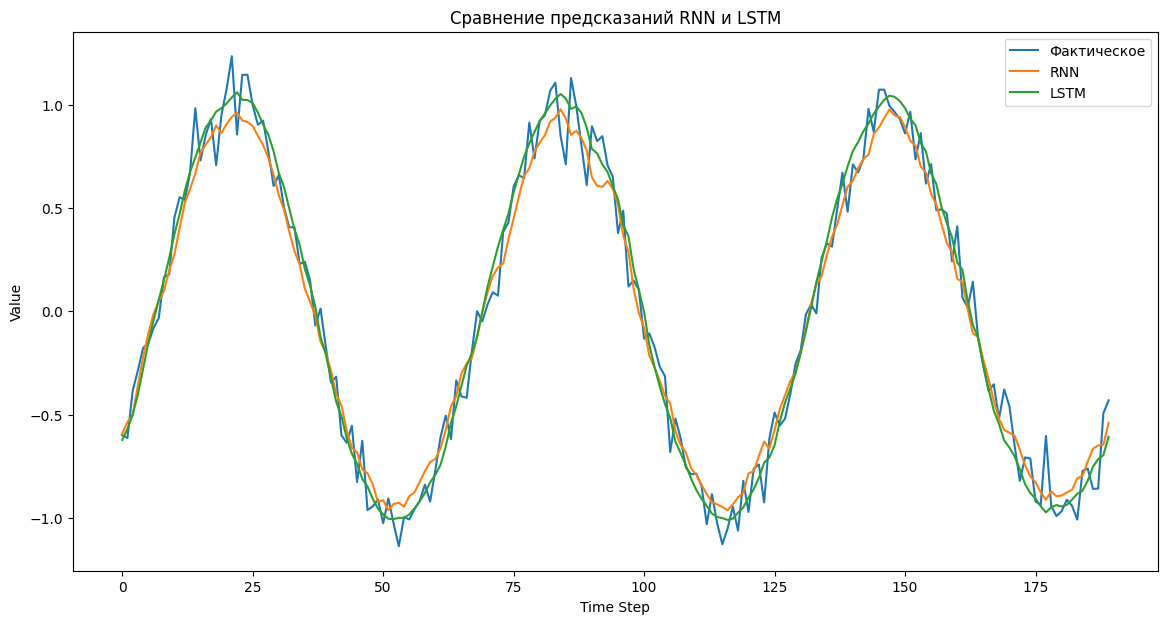

In [4]:
def get_predictions(model, data_loader):
    model.eval()
    predictions, true_values = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            y_pred = model(X_batch)
            predictions.extend(y_pred.squeeze().tolist())
            true_values.extend(y_batch.tolist())
    return predictions, true_values

rnn_predictions, true_values = get_predictions(RNNmodel, test_loader)

lstm_predictions, _ = get_predictions(LSTMmodel, test_loader)

plt.figure(figsize=(14, 7))

plt.plot(true_values, label='Фактическое')
plt.plot(rnn_predictions, label='RNN')
plt.plot(lstm_predictions, label='LSTM')

plt.title('Сравнение предсказаний RNN и LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


In [7]:
# 3. решите задачу набора данных лекции 7.

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

N = 2

df = pd.read_csv('ETTm1.csv')
dfs = np.array_split(df, N)

C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = dfs[0].OT
test = dfs[1].OT

model = ARIMA(train, order=(3,0,0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 92.36832833875458


In [12]:
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()

                predictions = model_fit.forecast(steps=len(test))

                mse = mean_squared_error(test, predictions)
                
                print(f'Parameters (p={p}, d={d}, q={q}): mse = {mse}')
                results.append((p, d, q, mse))

            except Exception as e:
                print(f"Error with parameters (p={p}, d={d}, q={q}): {e}")

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'MSE'])
best_params = results_df.loc[results_df['MSE'].idxmin()]

Parameters (p=0, d=0, q=0): mse = 92.50025445154968


C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=1): mse = 92.50516016574254


C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=2): mse = 92.50677610812002


C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=3): mse = 92.50429752970484
Parameters (p=0, d=1, q=0): mse = 136.5503960694064
Parameters (p=0, d=1, q=1): mse = 136.61080895012927
Parameters (p=0, d=1, q=2): mse = 136.77568000331667
Parameters (p=0, d=1, q=3): mse = 136.9787730473259
Parameters (p=1, d=0, q=0): mse = 92.34727195680105
Parameters (p=1, d=0, q=1): mse = 92.38018705163657
Parameters (p=1, d=0, q=2): mse = 92.36914428849629
Parameters (p=1, d=0, q=3): mse = 92.36467064685871
Parameters (p=1, d=1, q=0): mse = 136.5503960694064
Parameters (p=1, d=1, q=1): mse = 136.67217926783354
Parameters (p=1, d=1, q=2): mse = 137.2087002082253
Parameters (p=1, d=1, q=3): mse = 137.25215289535495
Parameters (p=2, d=0, q=0): mse = 92.38210694834196
Parameters (p=2, d=0, q=1): mse = 92.40829033658164
Parameters (p=2, d=0, q=2): mse = 92.36257320039647
Parameters (p=2, d=0, q=3): mse = 92.35382939550169
Parameters (p=2, d=1, q=0): mse = 136.86270698384772
Parameters (p=2, d=1, q=1): mse = 136.99228379798703
Parame

C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=3, d=1, q=1): mse = 136.96598636214958


C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Алексей\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=3, d=1, q=2): mse = 137.15282689643334
Parameters (p=3, d=1, q=3): mse = 137.43229328614675


In [13]:
print("Best Parameters (p, d, q):\n", best_params[['p', 'd', 'q']])
print("Best MSE:", best_params['MSE'])

Best Parameters (p, d, q):
 p    1.0
d    0.0
q    0.0
Name: 8, dtype: float64
Best MSE: 92.34727195680105


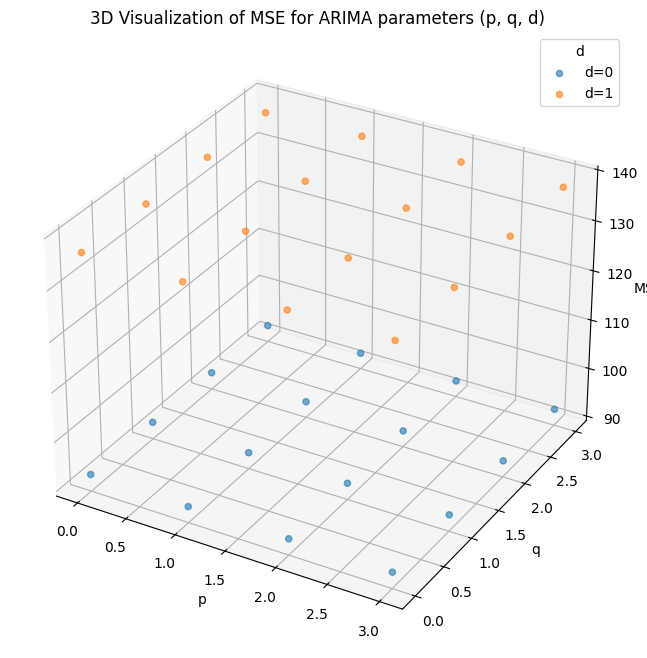

In [14]:
import matplotlib.pyplot as plt

results_df = results_df.groupby(["p", "d", "q"], as_index=False)["MSE"].mean()

d_values = results_df["d"].unique()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for d in d_values:
    subset_df = results_df[results_df["d"] == d]
    p_values = subset_df["p"]
    q_values = subset_df["q"]
    mse_values = subset_df["MSE"]

    ax.scatter(p_values, q_values, mse_values, label=f'd={d}', alpha=0.6)

ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('MSE')
ax.legend(title="d")
ax.set_title("3D Visualization of MSE for ARIMA parameters (p, q, d)")
plt.show()

In [15]:
alpha = 0.5

model = ARIMA(train, order=(1, 0, 0)).fit()

predictions = []
current_prediction = model.forecast(steps=1).iloc[0]

for true_value in test:
    predictions.append(current_prediction)
    current_prediction = alpha * true_value + (1 - alpha) * current_prediction

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error (Iterative with Exponential Smoothing): {mse}')

Mean Squared Error (Iterative with Exponential Smoothing): 0.18063080410607038
